In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

-0.8035124042690602


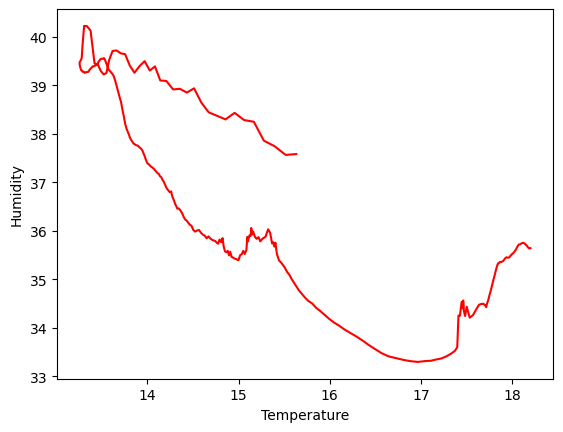

In [97]:
data = pd.read_csv("new_data.csv")
outside_data = pd.read_csv("outside_data.csv")
outside_data_new = pd.read_csv("outside_data_new.csv")

start_time = data["Time"][0] + 30
start_time2 = outside_data['Time'][0] + 30
end_time = start_time + 267
end_time2 = start_time2 + 267

time_mask = data['Time']> start_time
sliced_data = data[time_mask]
time_mask = sliced_data['Time'] < end_time
sliced_data = sliced_data[time_mask]

time_mask2 = outside_data['Time'] > start_time2
sliced_data2 = outside_data[time_mask2]
time_mask2 = sliced_data2['Time'] < end_time2
sliced_data2 = sliced_data2[time_mask2]

start_time3 = outside_data_new['Time'][0] + 30
end_time3 = start_time3 + 297

time_mask3 = outside_data_new['Time'] > start_time3
sliced_data3 = outside_data_new[time_mask3]
time_mask3 = sliced_data3['Time'] < end_time3
sliced_data3 = sliced_data3[time_mask3]

plt.plot(sliced_data3["Temperature"],sliced_data3["Humidity"],'r')
plt.xlabel("Temperature")
plt.ylabel("Humidity")

# important hidden variable is time, since both temperature and humidity must match up based on time of recording
# they seem to be inversely proportional

cc = np.corrcoef(sliced_data3["Temperature"],sliced_data3["Humidity"])
print(cc[1,0])


    

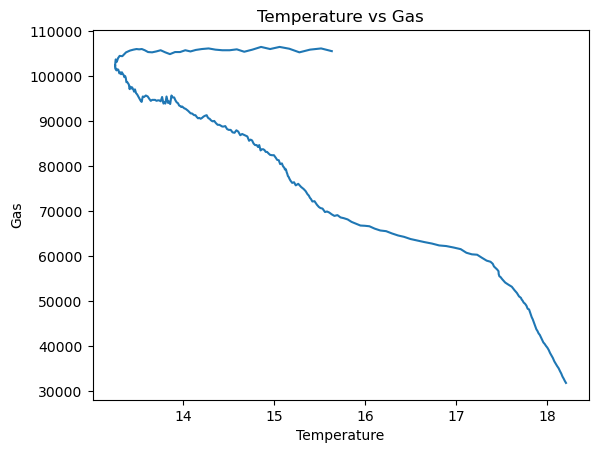

Coefficient of Correlation is -0.95


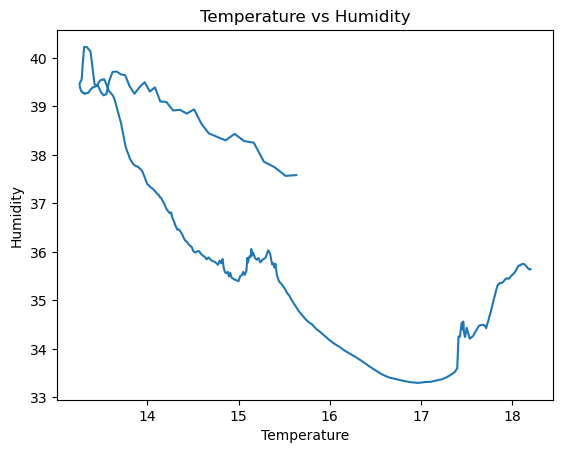

Coefficient of Correlation is -0.80


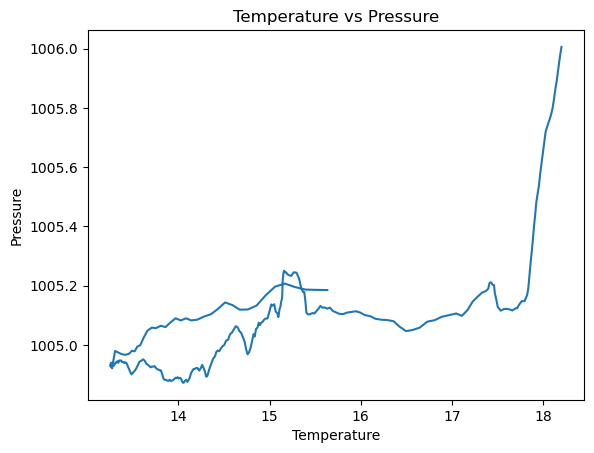

Coefficient of Correlation is 0.77


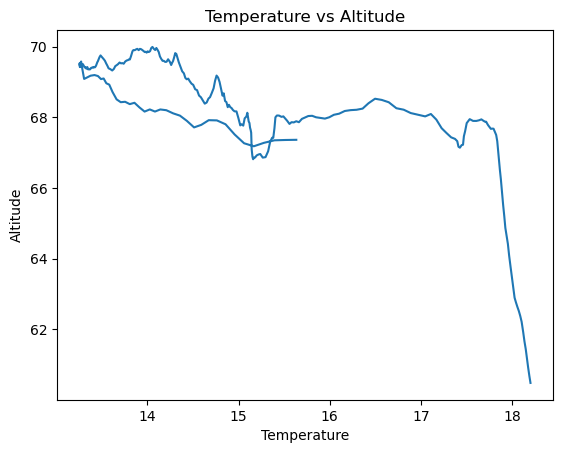

Coefficient of Correlation is -0.77


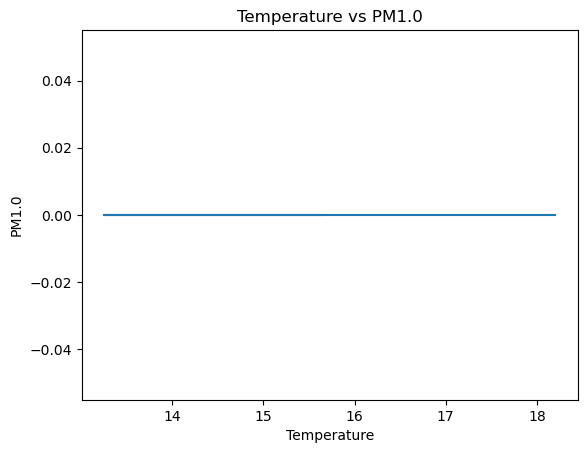

C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Coefficient of Correlation is nan


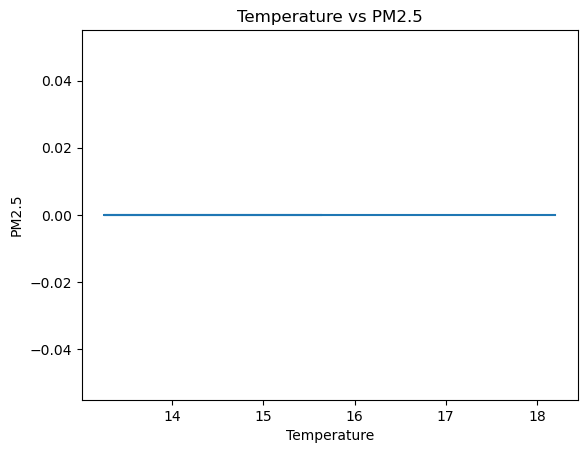

Coefficient of Correlation is nan


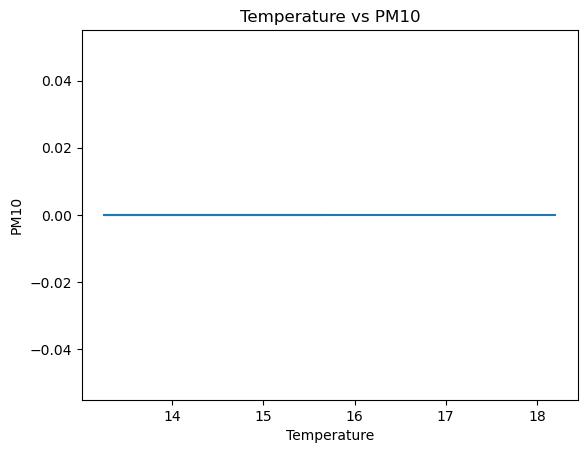

Coefficient of Correlation is nan


In [101]:
meta_data_new = ["Gas", "Humidity", "Pressure", "Altitude", "PM1.0", "PM2.5", "PM10"]

for data_type in meta_data_new:
    plt.plot(sliced_data3["Temperature"],sliced_data3[data_type])
    plt.title("Temperature vs " + data_type)
    plt.xlabel("Temperature")
    plt.ylabel(data_type)
    plt.show()
    cc = np.corrcoef(sliced_data3["Temperature"],sliced_data3[data_type])
    print("Coefficient of Correlation is %0.2f" %cc[1,0])
    
# all have negative correlation except for pressure

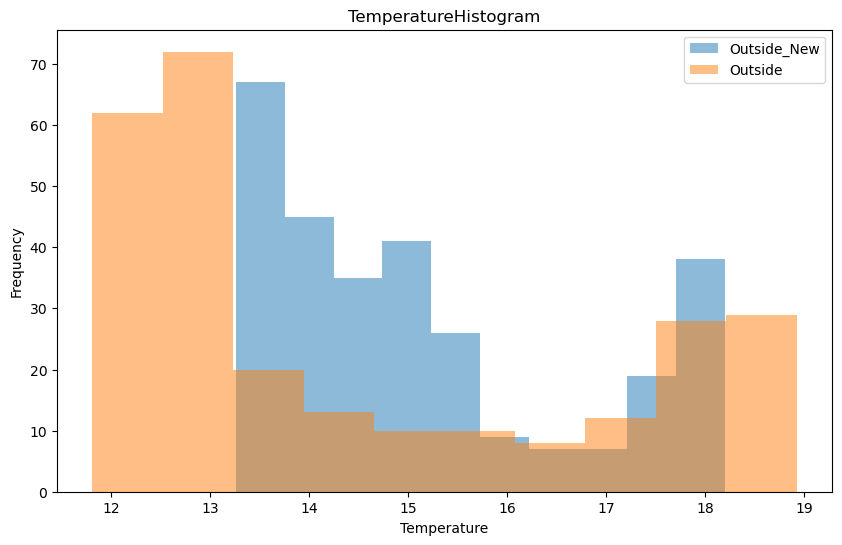

Outside_New Mean: 15.12
Outside_New STD: 1.57
Outside_New Uncertainty: 0.09
Outside Mean: 14.46
Outside STD: 2.39
Outside Uncertainty: 0.15
Diff = 4.48


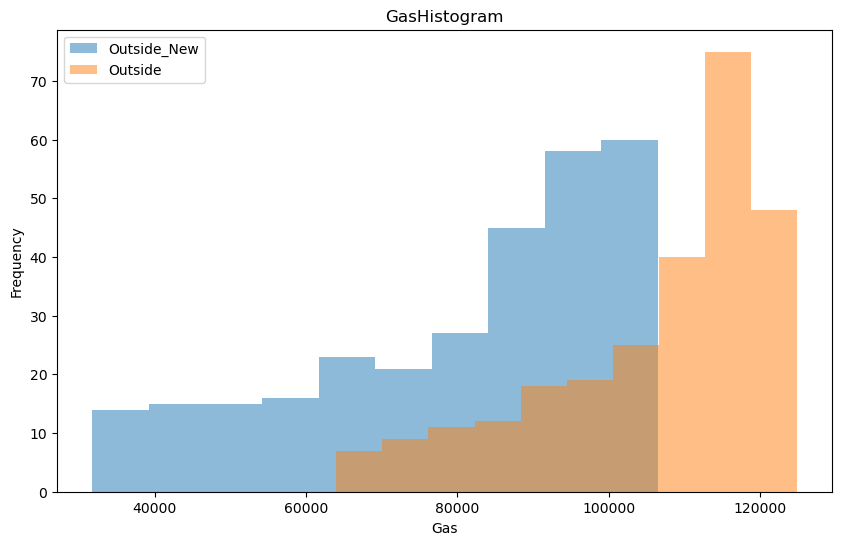

Outside_New Mean: 80883.84
Outside_New STD: 20811.05
Outside_New Uncertainty: 1207.58
Outside Mean: 106126.96
Outside STD: 14971.20
Outside Uncertainty: 916.22
Diff = 27.55


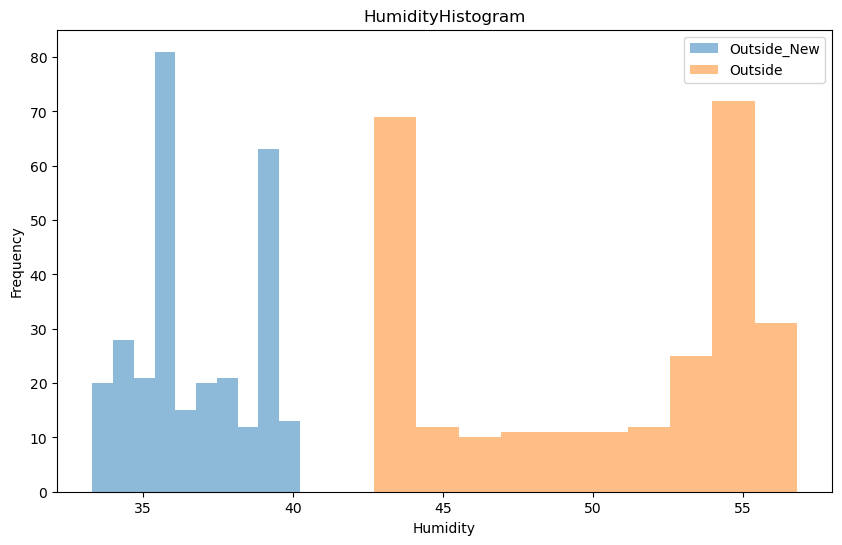

Outside_New Mean: 36.74
Outside_New STD: 1.94
Outside_New Uncertainty: 0.11
Outside Mean: 50.20
Outside STD: 5.14
Outside Uncertainty: 0.31
Diff = 42.75


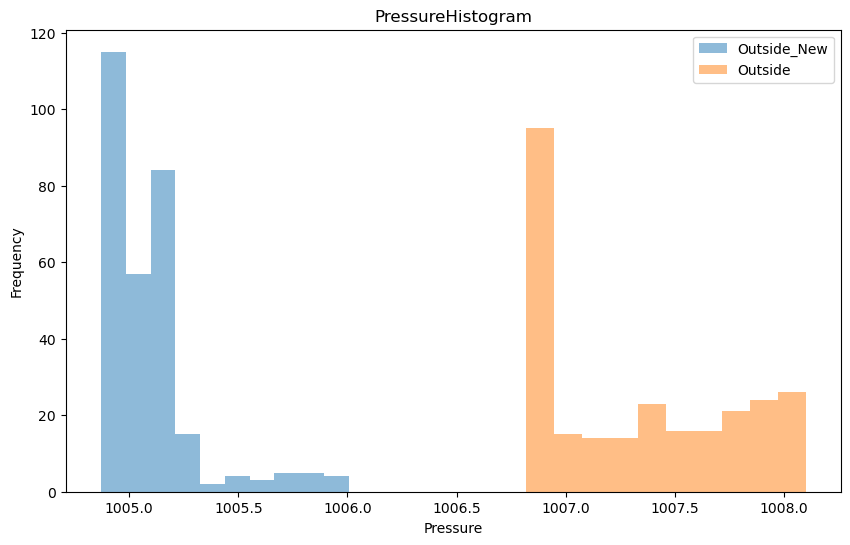

Outside_New Mean: 1005.09
Outside_New STD: 0.22
Outside_New Uncertainty: 0.01
Outside Mean: 1007.33
Outside STD: 0.44
Outside Uncertainty: 0.03
Diff = 83.73


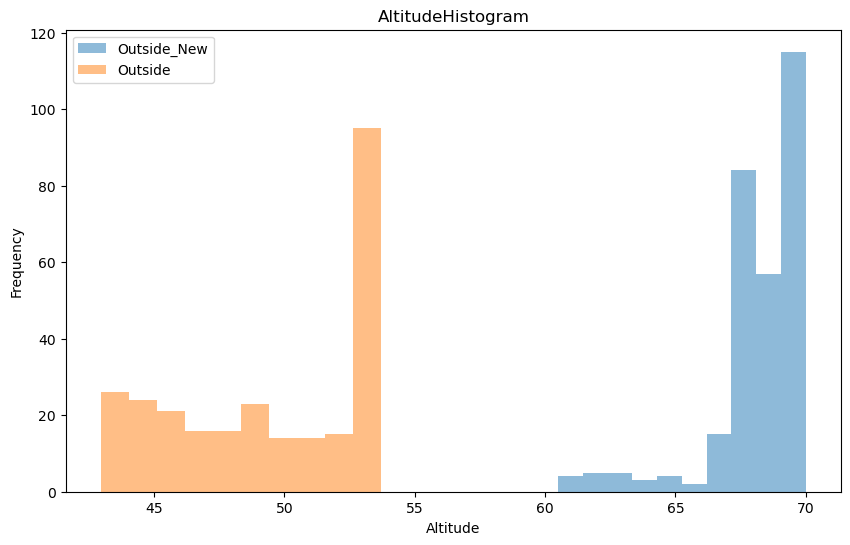

Outside_New Mean: 68.17
Outside_New STD: 1.80
Outside_New Uncertainty: 0.10
Outside Mean: 49.43
Outside STD: 3.65
Outside Uncertainty: 0.22
Diff = 83.81


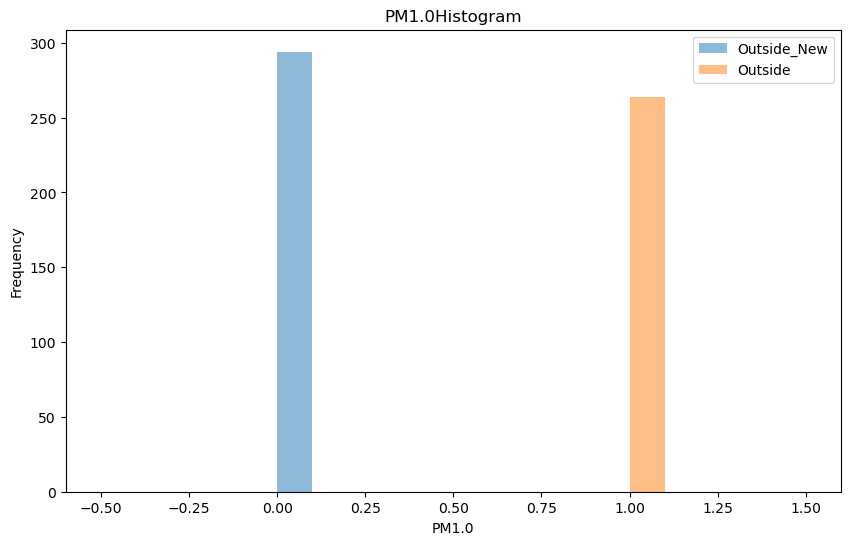

Outside_New Mean: 0.00
Outside_New STD: 0.00
Outside_New Uncertainty: 0.00
Outside Mean: 1.00
Outside STD: 0.00
Outside Uncertainty: 0.00
Diff = inf


C:\Users\User\AppData\Local\Temp\ipykernel_27944\3936848107.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  print("Diff = %0.2f" %np.abs((outside_new_mean - outside_mean)/outside_uncertainty))


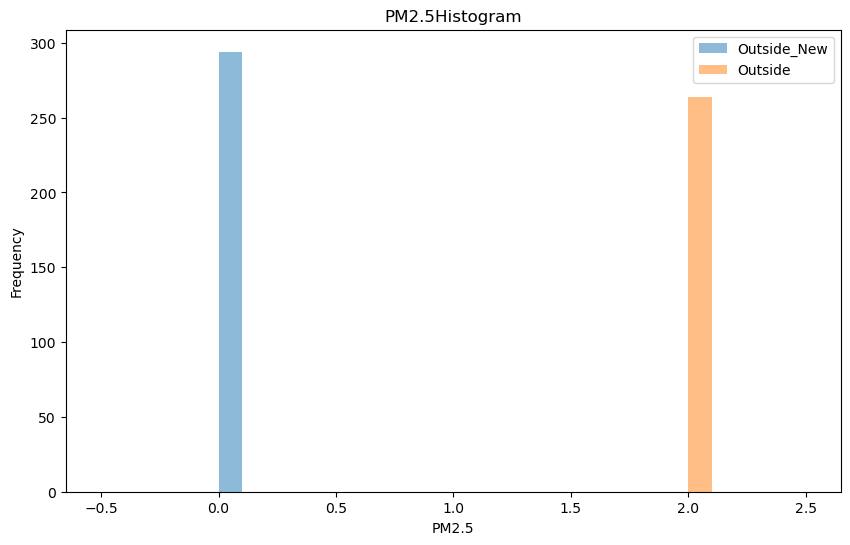

Outside_New Mean: 0.00
Outside_New STD: 0.00
Outside_New Uncertainty: 0.00
Outside Mean: 2.00
Outside STD: 0.00
Outside Uncertainty: 0.00
Diff = inf


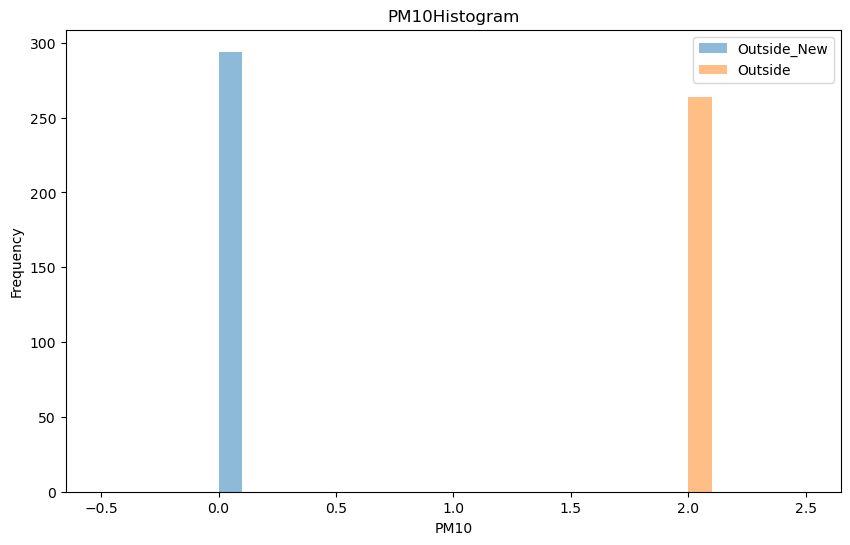

Outside_New Mean: 0.00
Outside_New STD: 0.00
Outside_New Uncertainty: 0.00
Outside Mean: 2.00
Outside STD: 0.00
Outside Uncertainty: 0.00
Diff = inf


In [80]:
meta_data = ["Temperature", "Gas", "Humidity", "Pressure", "Altitude", "PM1.0", "PM2.5", "PM10"]

for data_type in meta_data:
    plt.figure(figsize=(10,6))
    plt.hist(sliced_data3[data_type],alpha=0.5,label="Outside_New")
    plt.hist(sliced_data2[data_type],alpha=0.5,label="Outside")
    plt.title(data_type + "Histogram")
    plt.xlabel(data_type)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    outside_new_mean = np.mean(sliced_data3[data_type])
    outside_mean = np.mean(sliced_data2[data_type])
    outside_uncertainty = np.std(sliced_data2[data_type])/np.sqrt(267)
    print("Outside_New Mean: %0.2f" %np.mean(sliced_data3[data_type]))
    print("Outside_New STD: %0.2f" %np.std(sliced_data3[data_type]))
    print("Outside_New Uncertainty: %0.2f" %(np.std(sliced_data3[data_type])/np.sqrt(297)))
    print("Outside Mean: %0.2f" %np.mean(sliced_data2[data_type]))
    print("Outside STD: %0.2f" %np.std(sliced_data2[data_type]))
    print("Outside Uncertainty: %0.2f" %(np.std(sliced_data2[data_type])/np.sqrt(267)))
    print("Diff = %0.2f" %np.abs((outside_new_mean - outside_mean)/outside_uncertainty))

In [73]:
Ben_data = pd.read_csv("insidedata.csv")
Heick_outside_data = pd.read_csv("outsidedata.csv")
Ben_start_time = Ben_data["Time"][0] + 30
Heick_start_time = Heick_outside_data['Time'][0] + 30
Ben_end_time = Ben_start_time + 267
Heick_end_time = Heick_start_time + 267

Ben_time_mask = Ben_data['Time']> Ben_start_time
Ben_sliced_data = Ben_data[Ben_time_mask]
Ben_time_mask = Ben_sliced_data['Time'] < Ben_end_time
Ben_sliced_data = Ben_sliced_data[Ben_time_mask]

Heick_time_mask = Heick_outside_data['Time'] > Heick_start_time
Heick_sliced_data = Heick_outside_data[Heick_time_mask]
Heick_time_mask = Heick_sliced_data['Time'] < Heick_end_time
Heick_sliced_data = Heick_sliced_data[Heick_time_mask]


Ben_meta_data = ["temperature", "gas", "humidity", "pressure", "altitude", "pm10 standard", "pm25 standard", "pm100 standard"]
for data_type in Ben_meta_data:
    Ben_inside_mean = np.mean(Ben_sliced_data[data_type])
    Heick_outside_mean = np.mean(Heick_sliced_data[data_type])
    Ben_inside_uncertainty = np.std(Ben_sliced_data[data_type])/np.sqrt(267)
    print(data_type)
    print("Inside Mean: %0.2f" %np.mean(Ben_sliced_data[data_type]))
    print("Inside STD: %0.2f" %np.std(Ben_sliced_data[data_type]))
    print("Inside Uncertainty: %0.2f" %(np.std(Ben_sliced_data[data_type])/np.sqrt(267)))
    print("Outside Mean: %0.2f" %np.mean(Heick_sliced_data[data_type]))
    print("Outside STD: %0.2f" %np.std(Heick_sliced_data[data_type]))
    print("Outside Uncertainty: %0.2f" %(np.std(Heick_sliced_data[data_type])/np.sqrt(267)))
    print("Diff = %0.2f" %np.abs((Ben_inside_mean - Heick_outside_mean)/Ben_inside_uncertainty))

temperature
Inside Mean: 24.11
Inside STD: 0.07
Inside Uncertainty: 0.00
Outside Mean: 19.52
Outside STD: 2.78
Outside Uncertainty: 0.17
Diff = 1062.17
gas
Inside Mean: 231530.87
Inside STD: 25987.06
Inside Uncertainty: 1590.38
Outside Mean: 273040.05
Outside STD: 40534.47
Outside Uncertainty: 2480.67
Diff = 26.10
humidity
Inside Mean: 40.45
Inside STD: 0.13
Inside Uncertainty: 0.01
Outside Mean: 46.42
Outside STD: 5.35
Outside Uncertainty: 0.33
Diff = 729.77
pressure
Inside Mean: 1008.64
Inside STD: 0.03
Inside Uncertainty: 0.00
Outside Mean: 1007.57
Outside STD: 0.41
Outside Uncertainty: 0.03
Diff = 572.37
altitude
Inside Mean: 38.43
Inside STD: 0.26
Inside Uncertainty: 0.02
Outside Mean: 47.39
Outside STD: 3.44
Outside Uncertainty: 0.21
Diff = 572.66
pm10 standard
Inside Mean: 2.88
Inside STD: 0.64
Inside Uncertainty: 0.04
Outside Mean: 4.55
Outside STD: 1.38
Outside Uncertainty: 0.08
Diff = 42.49
pm25 standard
Inside Mean: 4.14
Inside STD: 0.98
Inside Uncertainty: 0.06
Outside Mean

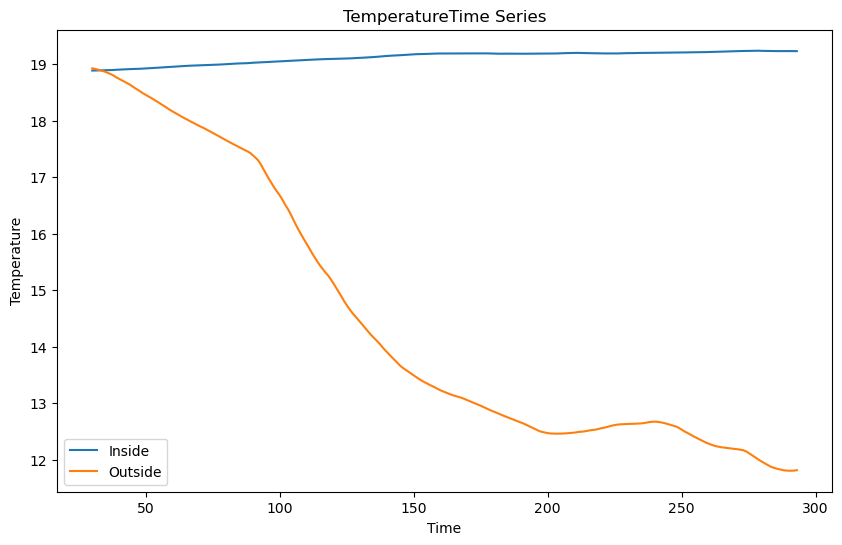

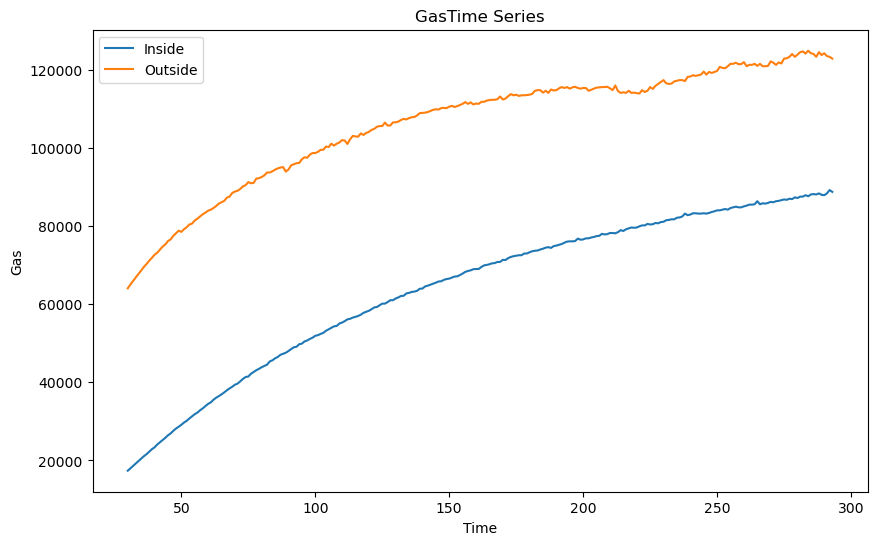

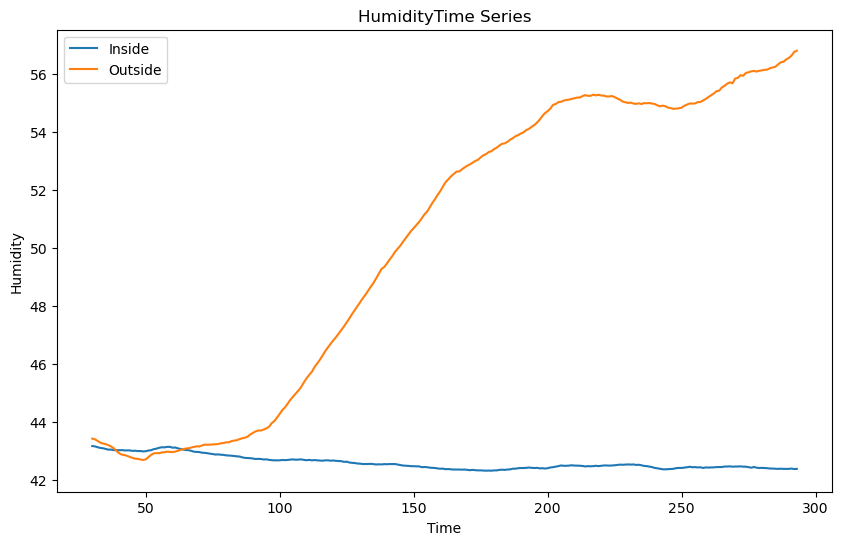

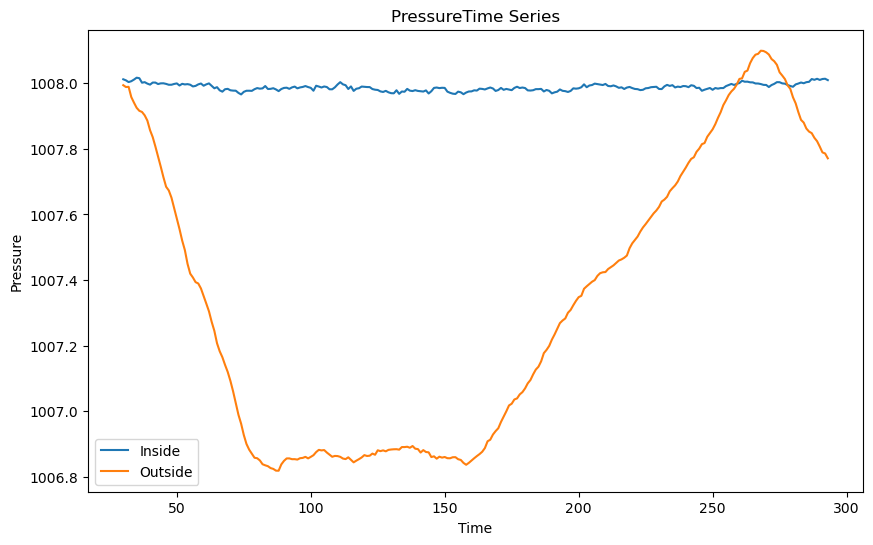

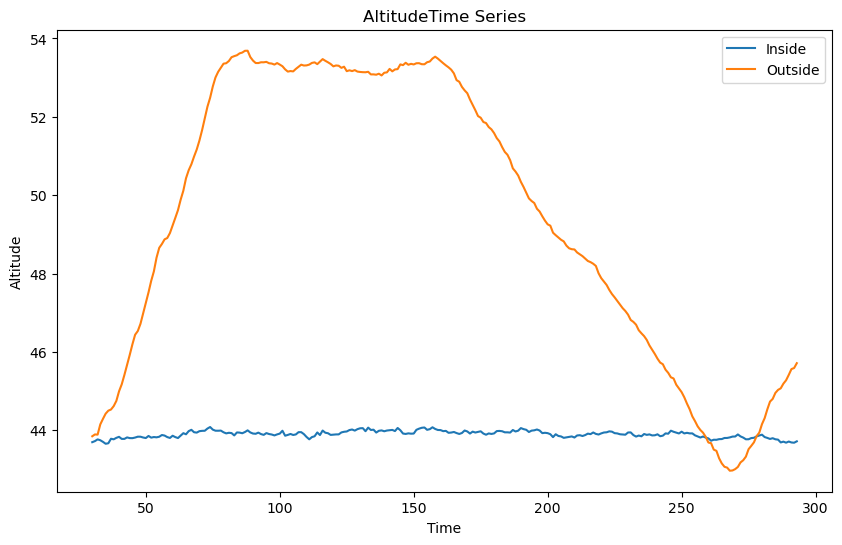

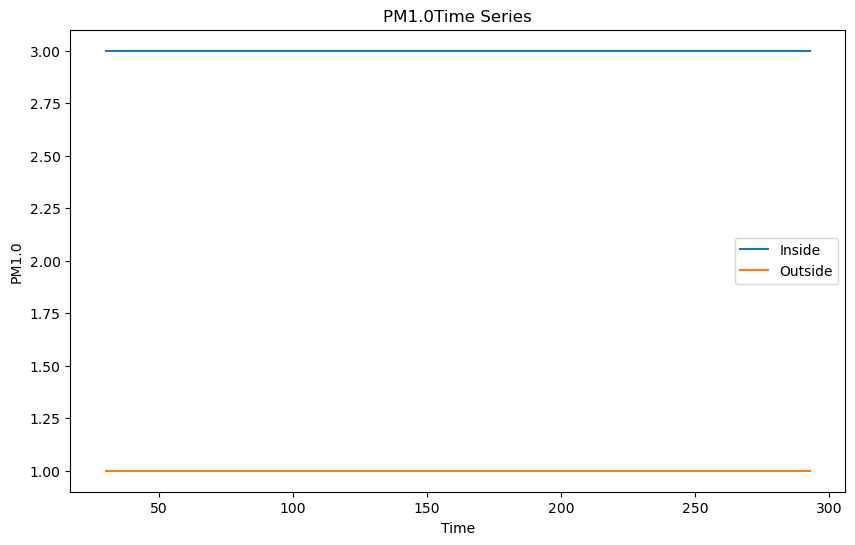

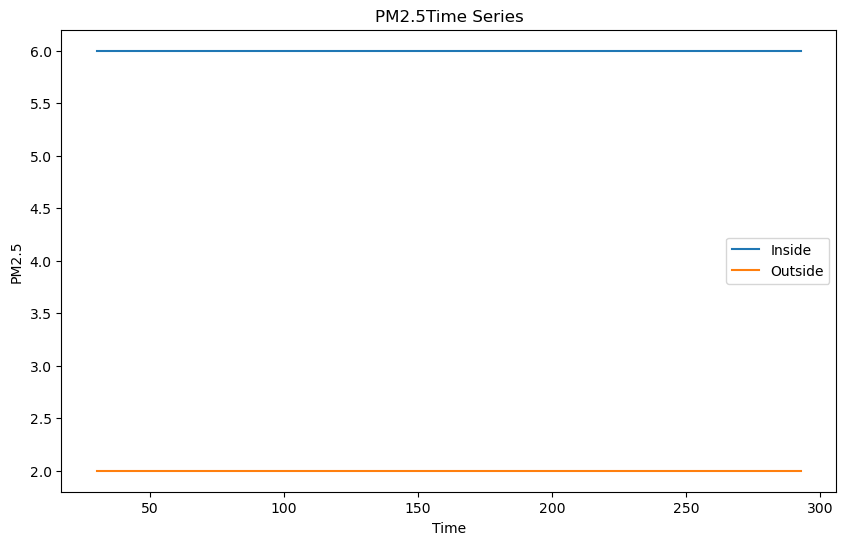

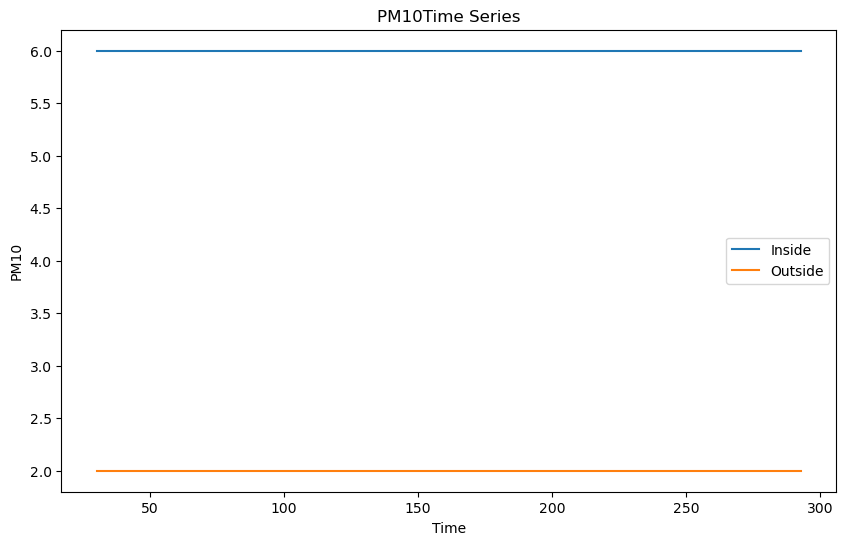

In [55]:
meta_data = ["Temperature", "Gas", "Humidity", "Pressure", "Altitude", "PM1.0", "PM2.5", "PM10"]
for data_type in meta_data:
    plt.figure(figsize=(10,6))
    plt.plot(sliced_data[data_type],label="Inside")
    plt.plot(sliced_data2[data_type],label="Outside")
    plt.title(data_type + "Time Series")
    plt.xlabel("Time")
    plt.ylabel(data_type)
    plt.legend()
    plt.show()

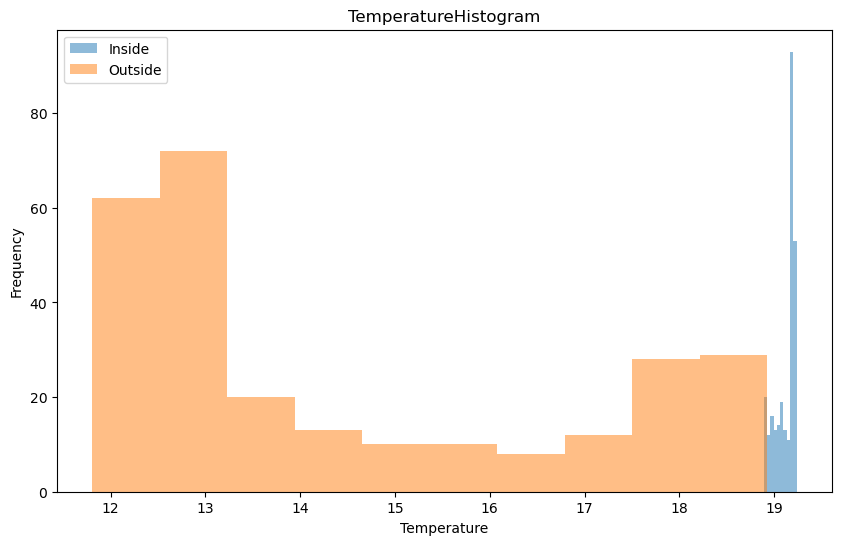

Inside Mean: 19.12
Inside STD: 0.11
Inside Uncertainty: 0.01
Outside Mean: 14.46
Outside STD: 2.39
Outside Uncertainty: 0.15
Diff = 719.79


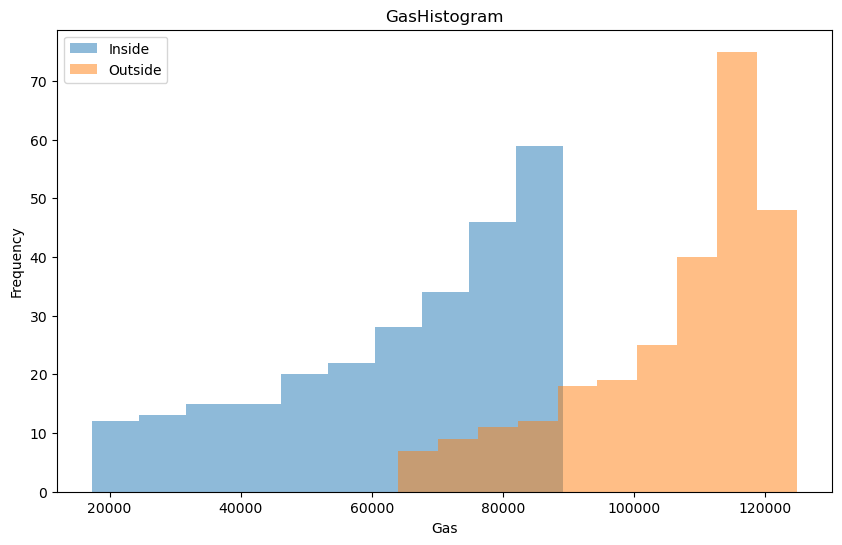

Inside Mean: 64026.38
Inside STD: 19790.15
Inside Uncertainty: 1211.14
Outside Mean: 106126.96
Outside STD: 14971.20
Outside Uncertainty: 916.22
Diff = 34.76


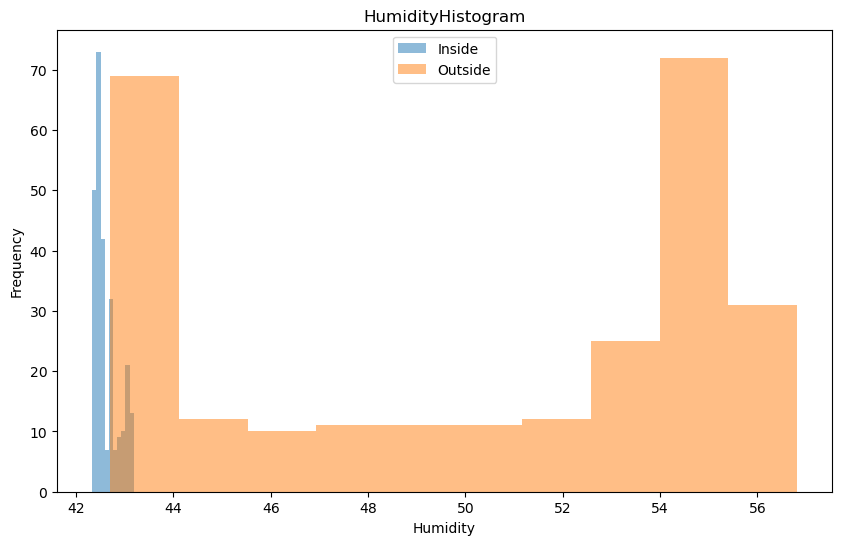

Inside Mean: 42.61
Inside STD: 0.24
Inside Uncertainty: 0.01
Outside Mean: 50.20
Outside STD: 5.14
Outside Uncertainty: 0.31
Diff = 520.52


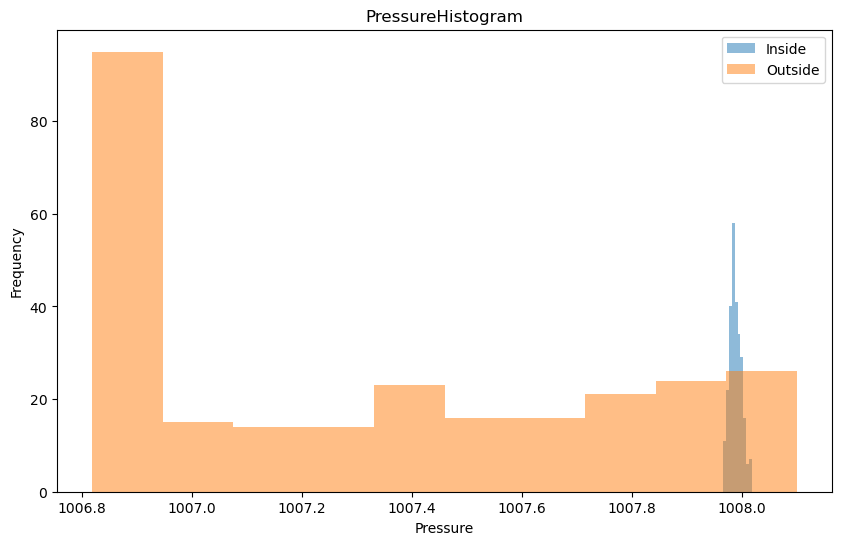

Inside Mean: 1007.99
Inside STD: 0.01
Inside Uncertainty: 0.00
Outside Mean: 1007.33
Outside STD: 0.44
Outside Uncertainty: 0.03
Diff = 1027.99


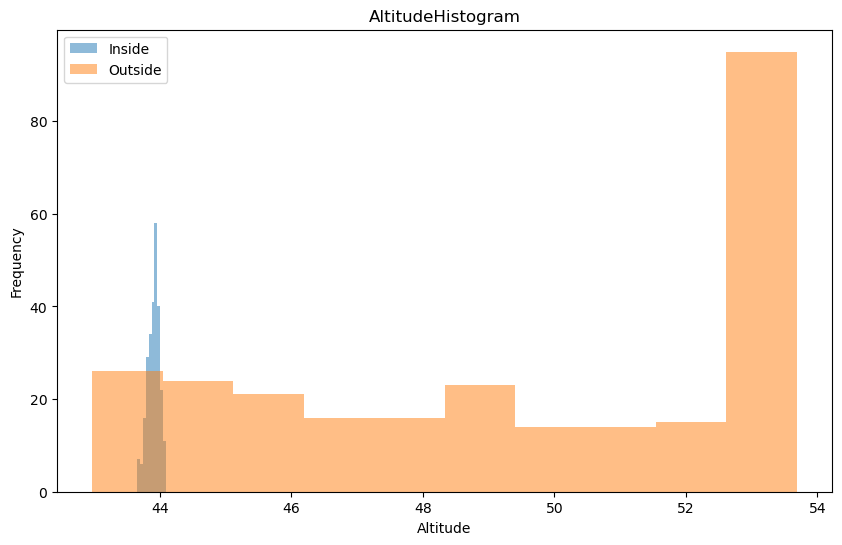

Inside Mean: 43.90
Inside STD: 0.09
Inside Uncertainty: 0.01
Outside Mean: 49.43
Outside STD: 3.65
Outside Uncertainty: 0.22
Diff = 1028.38


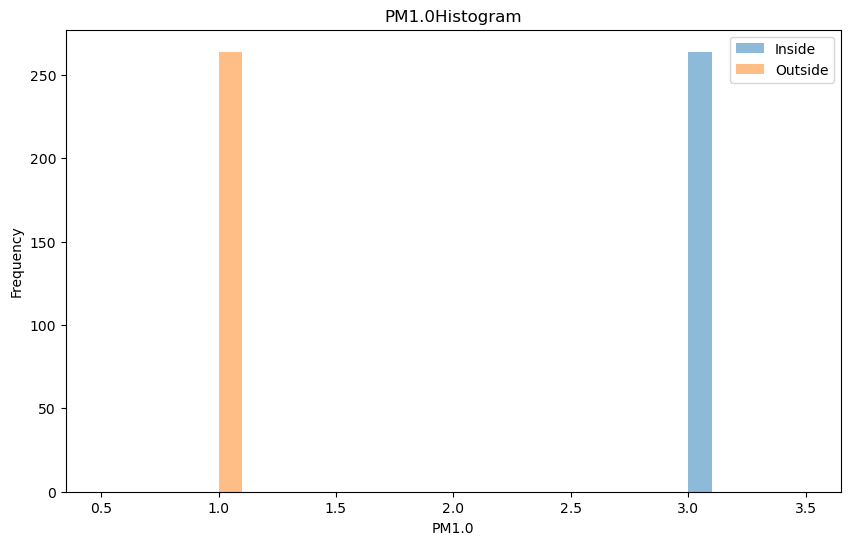

Inside Mean: 3.00
Inside STD: 0.00
Inside Uncertainty: 0.00
Outside Mean: 1.00
Outside STD: 0.00
Outside Uncertainty: 0.00
Diff = inf


C:\Users\User\AppData\Local\Temp\ipykernel_27944\1587253916.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  print("Diff = %0.2f" %np.abs((inside_mean - outside_mean)/inside_uncertainty))


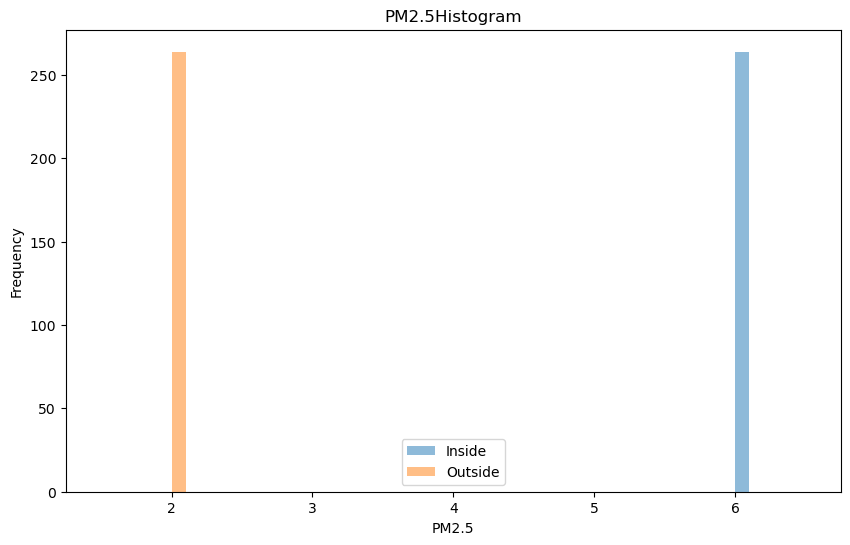

Inside Mean: 6.00
Inside STD: 0.00
Inside Uncertainty: 0.00
Outside Mean: 2.00
Outside STD: 0.00
Outside Uncertainty: 0.00
Diff = inf


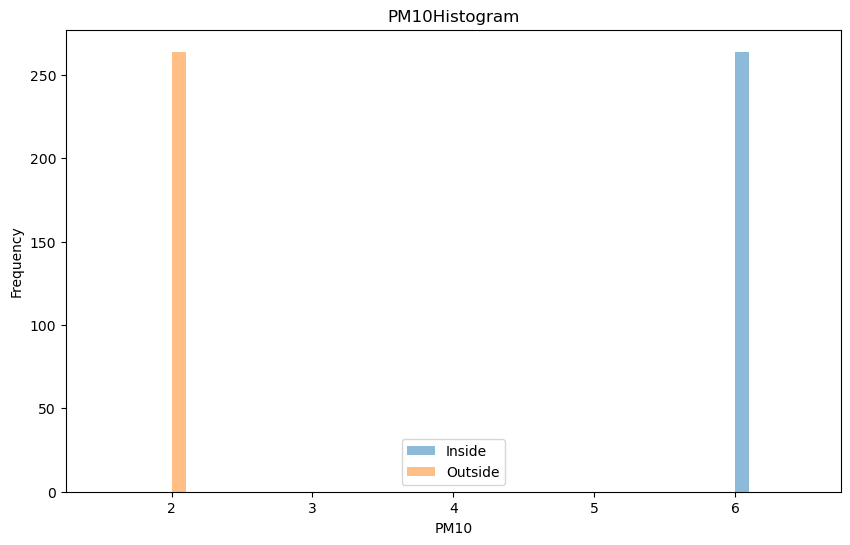

Inside Mean: 6.00
Inside STD: 0.00
Inside Uncertainty: 0.00
Outside Mean: 2.00
Outside STD: 0.00
Outside Uncertainty: 0.00
Diff = inf


In [67]:
for data_type in meta_data:
    plt.figure(figsize=(10,6))
    plt.hist(sliced_data[data_type],alpha=0.5,label="Inside")
    plt.hist(sliced_data2[data_type],alpha=0.5,label="Outside")
    plt.title(data_type + "Histogram")
    plt.xlabel(data_type)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    inside_mean = np.mean(sliced_data[data_type])
    outside_mean = np.mean(sliced_data2[data_type])
    inside_uncertainty = np.std(sliced_data[data_type])/np.sqrt(267)
    print("Inside Mean: %0.2f" %np.mean(sliced_data[data_type]))
    print("Inside STD: %0.2f" %np.std(sliced_data[data_type]))
    print("Inside Uncertainty: %0.2f" %(np.std(sliced_data[data_type])/np.sqrt(267)))
    print("Outside Mean: %0.2f" %np.mean(sliced_data2[data_type]))
    print("Outside STD: %0.2f" %np.std(sliced_data2[data_type]))
    print("Outside Uncertainty: %0.2f" %(np.std(sliced_data2[data_type])/np.sqrt(267)))
    print("Diff = %0.2f" %np.abs((inside_mean - outside_mean)/inside_uncertainty))

    

In [25]:
for data_type in meta_data:
    inside_mean = np.mean(data[data_type])
    outside_mean = np.mean(outside_data[data_type])
    
    inside_std = np.std(data[data_type],ddof=1)
    outside_std = np.std(outside_data[data_type],ddof=1)
    
    inside_se = inside_std / np.sqrt(len(data))
    outside_se = outside_std / np.sqrt(len(outside_data))
    
    mean_difference = np.abs(inside_mean - outside_mean)
    
    pooled_se = np.sqrt(inside_se**2 + outside_se**2)
    
    if mean_difference > 3 * pooled_se:
        print(f"The difference in means for {data_type} is statistically significant.")
    else:
        print(f"The difference in means for {data_type} is not statistically significant.")

The difference in means for Temperature is statistically significant.
The difference in means for Gas is statistically significant.
The difference in means for Humidity is statistically significant.
The difference in means for Pressure is not statistically significant.
The difference in means for Altitude is not statistically significant.
The difference in means for PM1.0 is statistically significant.
The difference in means for PM2.5 is statistically significant.
The difference in means for PM10 is statistically significant.
